In [ ]:
# NASDAQ LINK

# Total Assets from Balance Sheet
# Free sample covers only the range for years 2010 - 2015. Only paid membership provides more actual data.

# NYSE Investors typically view the NYSE as an exchange for older, more established companies.
# Nasdaq tend  s to be home to newer companies focused on technology and innovation.
# Nasdaq.com adds IPO, Insider Data, 13F, Short Interest, and Analyst Forecasts coverage that Yahoo Finance skips.
# Quandl is since 2021 retired. The Nasdaq Data Link Python module is free. If you would like to make more than 50 calls a day, however, you will need to create a free account and set your API key
# Yahoo Finance includes Alerts, Data Visualizations, ETF Performance, and Education categories that Nasdaq.com omits.

In [ ]:
# Create Nasdaq Link Account ( Quanld is since 2021 retired )
# https://data.nasdaq.com/
# each user has unique API key, use it in the sessions below

In [ ]:
# install libraries

In [11]:
import sys
print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
pip install playwright

In [ ]:
pip install nasdaq-data-link

In [ ]:
pip install ndlbulkdownload

In [ ]:
pip install selenium

In [ ]:
import asyncio
import playwright
import math
import csv
import nasdaqdatalink
import pandas_datareader.data as web
import datetime as dt
import requests
import json
import httpx
import time
import selenium
from selenium import webdriver
import os
import os.path
from subprocess import Popen, PIPE
import sys
from threading import Thread
from urllib.parse import urlparse
from urllib.request import urlretrieve
import venv
import pandas as pd

# prepare the agent style of communication
def tickersNasdaq():
    url = "https://api.nasdaq.com/api/screener/stocks?tableonly=true&limit=25&offset=0&download=true"
    user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15"
    headers = {"User-Agent": user_agent}
    response = requests.get(url, headers=headers)
    print("Response:")
    print(response.text)

# Example usage
tickersNasdaq()


In [ ]:
 # Nasdaq link API key (after you create Nasdaq Link Account, you find your free key in your Settings. 50 requests per month are free.)

nasdaqdatalink.ApiConfig.api_key = "use your API key"

In [ ]:
# Download the Database MF1, e.g. Germany has covered 194 tables, e.g. company longname "Deutsche Bank AG", ticker "DB"
# Mergent Global Fundamentals Data - provides fundamental indicators on publicly traded companies covered by the Russel Global Index.
# Including historical financial statements (balance sheets, cash flow statements, income statements and ratios) dating back to 2005.
# https://data.nasdaq.com/databases/MF1

nasdaqdatalink.export_table('MER/F1', filename='/content/db.zip')

In [ ]:
# you can use commands: nasdaqdatalink get, get_table, export_table, bulkdownload, ...

mydata = nasdaqdatalink.get("FRED/GDP")
mydata = nasdaqdatalink.get("EIA/PET_RWTC_D")
mydata = nasdaqdatalink.get("EIA/PET_RWTC_D", returns="numpy")
mydata = nasdaqdatalink.get("FRED/GDP", start_date="2001-12-31", end_date="2005-12-31")
mydata = nasdaqdatalink.get(["NSE/OIL.1", "WIKI/AAPL.4"])
mydata = nasdaqdatalink.get("WIKI/AAPL", rows=5)
mydata = nasdaqdatalink.get("EIA/PET_RWTC_D", collapse="monthly")
mydata = nasdaqdatalink.get("FRED/GDP", transformation="rdiff")
mydata = nasdaqdatalink.get_table('WIKI/PRICES', qopts = { 'columns': ['ticker', 'date', 'close'] }, ticker = ['AAPL', 'MSFT'], date = { 'gte': '2016-01-01', 'lte': '2016-12-31' })
mydata = nasdaqdatalink.get_table('ZACKS/FC', ticker='AAPL')
mydata = nasdaqdatalink.get_table('ZACKS/FC', paginate=True)
mydata = nasdaqdatalink.get_table('ZACKS/FC', paginate=True, ticker='AAPL', qopts={'columns': ['ticker', 'per_end_date']})
mydata = nasdaqdatalink.get_table('ZACKS/FC', paginate=True, ticker=['AAPL', 'MSFT'], per_end_date={'gte': '2015-01-01'}, qopts={'columns':['ticker', 'per_end_date']})
nasdaqdatalink.export_table('MER/F1', filename='/content/db.zip')
nasdaqdatalink.export_table('ZACKS/FC',  ticker=['AAPL', 'MSFT'], per_end_date={'gte': '2015-01-01'}, qopts={'columns':['ticker', 'per_end_date']})
mydata = nasdaqdatalink.bulkdownload("ZEA")


In [21]:
mydata = pd.read_csv("/content/MER_F1.csv")
print(mydata.head())

   compnumber    reportid  mapcode        amount  reportdate reporttype  \
0         372  1504051200  -9087.0  4.865639e+03  2010-12-31          A   
1         372  1504051200  -9085.0  1.131050e-01  2010-12-31          A   
2         372  1504051200  -8396.0  1.064610e+11  2010-12-31          A   
3         372  1504051200  -7562.0  1.203874e+02  2010-12-31          A   
4         372  1504051200  -6159.0  1.247799e+00  2010-12-31          A   

  auditorstatus currency consolidated                          longname  ...  \
0             N      USD         True  American International Group Inc  ...   
1             N      USD         True  American International Group Inc  ...   
2             N      USD         True  American International Group Inc  ...   
3             N      USD         True  American International Group Inc  ...   
4             N      USD         True  American International Group Inc  ...   

       city statecode country zipcode   phonenumber faxnumber      w

/tmp/ipython-input-2512196169.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  mydata = pd.read_csv("/content/MER_F1.csv")


In [ ]:
filtered_mydata = mydata[mydata['compnumber']==2438]
filtered_mydata2 = filtered_mydata[filtered_mydata['indicator']=='Total Assets']
display(filtered_mydata2)

In [54]:
# filtered_mydata, amount,	reportdate
filtered_mydata2.dtypes

,0
compnumber,int64
reportid,int64
mapcode,float64
amount,float64
reportdate,object
reporttype,object
auditorstatus,object
currency,object
consolidated,object
longname,object


In [55]:
filtered_mydata2.dtypes
filtered_mydata2[["reportdate"]] = filtered_mydata2[["reportdate"]].apply(pd.to_datetime)

/tmp/ipython-input-3665812371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mydata2[["reportdate"]] = filtered_mydata2[["reportdate"]].apply(pd.to_datetime)


In [56]:
new = filtered_mydata2.filter(['reportdate','amount'], axis=1)
new=new.set_index('reportdate')
print(new)


                  amount
reportdate              
2010-12-31  1.905630e+12
2010-12-31  1.905630e+12
2011-03-31  1.842245e+12
2011-06-30  1.849695e+12
2011-09-30  2.282479e+12
2011-12-31  2.164103e+12
2011-12-31  2.164103e+12
2012-03-31  2.103295e+12
2012-06-30  2.241174e+12
2012-09-30  2.185646e+12
2012-12-31  2.012329e+12
2012-12-31  2.012329e+12
2013-03-31  2.032690e+12
2013-06-30  1.909879e+12
2013-09-30  1.787971e+12
2013-12-31  1.611400e+12
2013-12-31  1.611400e+12
2014-03-31  1.636574e+12
2014-06-30  1.665410e+12
2014-09-30  1.709189e+12
2014-12-31  1.708703e+12
2014-12-31  1.708703e+12
2015-03-31  1.955465e+12
2015-06-30  1.694176e+12
2015-09-30  1.719374e+12
2015-12-31  1.629130e+12
2015-12-31  1.629130e+12


<Axes: xlabel='reportdate'>

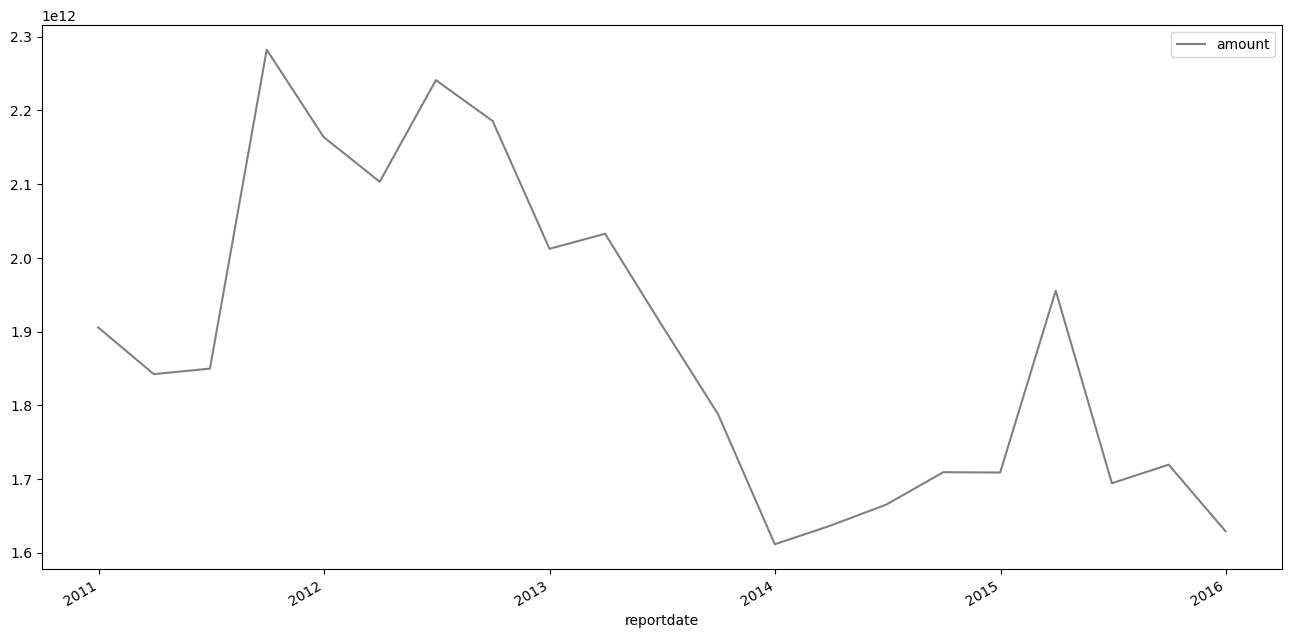

In [57]:
# Total assets by Quarter or Annual, e.g.
# 2013-12-31, €1.611 Trillion · -20.32% ;
# 2012-12-31, €2.022 Trillion · -6.55% ;
# 2011-12-31, €2.164 Trillion · 13.56% ;
# 2010-12-31, €1.905 Trillion · 26.99%.
new[['amount']].plot(label='Deutsche Bank',figsize=(16, 8), color=['grey'])

In [ ]:
# https://blog.apify.com/scrape-nasdaq-stock-market-data-python/
# https://blog.quantinsti.com/nasdaq-data-link/
# https://docs.data.nasdaq.com/docs/python-installation
# https://data.nasdaq.com/account/profile
# https://docs.data.nasdaq.com/docs/parameters-2#section-times-series-parameters
# https://data.nasdaq.com/databases/MF1
